In [7]:
import scanpy as sc
import pickle
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [24]:
rn=sc.read_h5ad('SNARE-seq/ad/rn.h5ad')
an=sc.read_h5ad('SNARE-seq/ad/an.h5ad')

In [13]:
gene_peak_regress=pickle.load(open('SNARE-seq/ad/gene_peak_regress_250k.pkl','rb'))
gene_peak_regress.keys()

dict_keys(['peaks', 'filtered_peaks', 'R2', 'R2_adj'])

In [48]:
print('Total counts of potential gene-peak pairs: ', sum([df.shape[0] for df in gene_peak_regress['filtered_peaks'].values()]))

Total counts of potential gene-peak pairs:  38509


In [23]:
gene_peak_regress['filtered_peaks']['Hs6st3'][:5]

,Coef.,Std.Err.,t,P>|t|,[0.025,0.975]
chr14:119708138-119708473,1.311243,0.451855,2.901912,3.716894e-03,0.425518,2.196967
chr14:119638958-119639159,1.290890,0.320818,4.023740,5.769632e-05,0.662023,1.919758
chr14:119821534-119821811,1.176625,0.263758,4.461001,8.245430e-06,0.659607,1.693644
chr14:119606762-119607179,1.102226,0.214917,5.128602,2.972815e-07,0.680945,1.523507
chr14:119223272-119223560,1.005992,0.181593,5.539814,3.103382e-08,0.650034,1.361951


In [74]:
gene_peak_regress['filtered_peaks']['Hs6st3'].index[0]

'chr14:119708138-119708473'

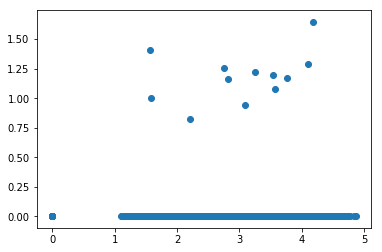

In [30]:
plt.scatter(rn.obs_vector('Hs6st3'), an.obs_vector('chr14:119708138-119708473'))

In [33]:
gene_peak_regress['filtered_peaks']['Etl4'][:5]

,Coef.,Std.Err.,t,P>|t|,[0.025,0.975]
chr2:20929922-20930081,1.398191,0.329062,4.249020,0.000022,0.753165,2.043218
chr2:20709248-20709579,1.011983,0.381016,2.656012,0.007919,0.265116,1.758850
chr2:20608386-20608691,0.959775,0.351186,2.732956,0.006288,0.271382,1.648169
chr2:20516620-20516843,0.912843,0.242455,3.764995,0.000167,0.437583,1.388104
chr2:19734940-19735181,0.906616,0.227989,3.976582,0.000070,0.459713,1.353519


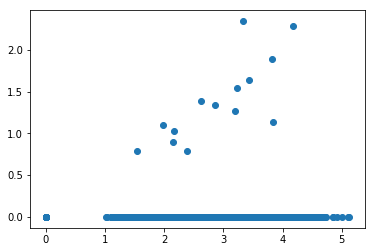

In [34]:
plt.scatter(rn.obs_vector('Etl4'), an.obs_vector('chr2:20929922-20930081'))

In [38]:
import scipy.stats

In [37]:
scipy.stats.ranksums([1],[0,1,2,3,4,5])

RanksumsResult(statistic=-0.75, pvalue=0.4532547047537364)

In [39]:
scipy.stats.ranksums([4],[0,0,0,0,0,0,0,1,2,3,4,5])

RanksumsResult(statistic=1.2026755886059097, pvalue=0.22910188406505871)

In [73]:
obs_assign=get_regulatory_matrix(gene_peak_regress['filtered_peaks'],rn,an)

In [77]:
list(obs_assign.keys())[:5]

['0610040J01Rik_chr5:64030301-64030609',
 '0610040J01Rik_chr5:63871953-63872475',
 '0610040J01Rik_chr5:64084603-64084961',
 '0610040J01Rik_chr5:63908670-63909416',
 '0610040J01Rik_chr5:63886677-63887059']

In [78]:
reg_df=pd.DataFrame(obs_assign)
reg_df.index=rn.obs_names
reg_df=reg_df.T

In [86]:
reg_df.shape

(38509, 10309)

In [90]:
from scipy.io import mmwrite
from scipy.sparse import csr_matrix
import numpy as np

In [2]:
import scanpy as sc
import pickle
import matplotlib.pyplot as plt
import pandas as pd
from sklearn import preprocessing

In [100]:
rn=sc.read_h5ad('/home/xionglei/yanqiu/regulatory/SNARE-seq/cellline_meta//rn.h5ad')
an=sc.read_h5ad('/home/xionglei/yanqiu/regulatory/SNARE-seq/cellline_meta//an.h5ad')

In [61]:
print(rn.shape, an.shape)

(153, 9266) (153, 26391)


In [62]:
gene_around_peaks=pickle.load(open('/home/xionglei/yanqiu/regulatory/SNARE-seq/cellline_meta/gene_around_peaks_250k.pkl','rb'))

In [107]:
weights=rn.obs['Weights']

In [108]:
gene='A2M'
around_peaks=gene_around_peaks[gene]
atac_df={}
for peak in around_peaks: 
    atac_df[peak]=an.obs_vector(peak)
X = pd.DataFrame(atac_df)
y = rn.obs_vector(gene)
est = sm.WLS(y, X, weights=weights).fit()
resid=est.resid
basic=est.summary2().tables[0]
coefs=est.summary2().tables[1]
R2=float(basic.iloc[6,1])
R2_adj=float(basic.iloc[0,3])
coefs=coefs.astype('float')        
filtered_peaks=coefs[coefs['P>|t|']<0.05].sort_values('Coef.', ascending=False)

In [109]:
filtered_peaks

,Coef.,Std.Err.,t,P>|t|,[0.025,0.975]
chr12:9064208-9065366,0.532724,0.226052,2.356643,0.019742,0.086042,0.979406
chr12:8949323-8950233,0.306920,0.123295,2.489328,0.013898,0.063289,0.550552


In [34]:
sorted(gene_peak_regress_ori['R2_adj'].items(), key=lambda x: x[1], reverse=True)[:5]

[('Hs6st3', 0.43),
 ('Etl4', 0.406),
 ('Lrrc4c', 0.377),
 ('Kcnq5', 0.353),
 ('Rbm25', 0.345)]

In [6]:
R2_sorted=sorted(gene_peak_regress['R2_adj'].items(), key=lambda x: x[1], reverse=True)

In [7]:
R2_sorted[:5]

[('Lrrc4c', 0.755),
 ('Kcnq5', 0.713),
 ('Cntnap2', 0.699),
 ('Etl4', 0.668),
 ('Rbm25', 0.647)]

In [9]:
peaks=gene_peak_regress['peaks']['Lrrc4c']

In [19]:
# check residual distribution

import statsmodels.api as sm

In [6]:
#from regulatory_matrix import plot_gene_peak
from sklearn import preprocessing
import numpy as np
import statsmodels.api as sm

In [3]:
rn=sc.read_h5ad('/home/xionglei/yanqiu/regulatory/SNARE-seq/ad_imputed2/rn.h5ad')
an=sc.read_h5ad('/home/xionglei/yanqiu/regulatory/SNARE-seq/ad_imputed2/an.h5ad')
gene_peak_regress=pickle.load(open('SNARE-seq/ad_imputed2/gene_peak_regress_250k.pkl','rb'))

In [22]:
gene_info = pickle.load(open('/home/xionglei/yanqiu/regulatory/lib/gene_info_hg.pkl', 'rb'))

In [23]:
gene_id_to_name=gene_info['gene_id_to_name']
gene_name_to_id={}
for gene_id in gene_id_to_name.keys():
        gene_name=gene_id_to_name[gene_id]
        gene_name_to_id.setdefault(gene_name,[])    
        gene_name_to_id[gene_name].append(gene_id)
        gene_name_to_id.setdefault(gene_id.split('.')[0],[])
        gene_name_to_id[gene_id.split('.')[0]].append(gene_id)

In [24]:
gene_name_to_id['ENSG00000006747']

['ENSG00000006747.14']

In [25]:
import scipy.stats

In [41]:
a=[0,0,0,0,0,1,1,1,1,1,1]*2
b=[1,0,1,1,0,2,2,3,2,3,4]*2
#b=b[::-1]
print(scipy.stats.ranksums(a,b))
print(scipy.stats.mannwhitneyu(a,b))
print(scipy.stats.wilcoxon(a,b))

RanksumsResult(statistic=-3.2392224350098395, pvalue=0.0011985606115827165)
MannwhitneyuResult(statistic=104.0, pvalue=0.0003261479028184698)
WilcoxonResult(statistic=0.0, pvalue=0.00011246085652581772)


In [42]:
a=[0,0,0,0,0,1,1,1,1,1,1]*2
b=[1,0,1,1,0,2,2,3,2,3,4]*2
b=b[::-1]
print(scipy.stats.ranksums(a,b))
print(scipy.stats.mannwhitneyu(a,b))
print(scipy.stats.wilcoxon(a,b))

RanksumsResult(statistic=-3.2392224350098395, pvalue=0.0011985606115827165)
MannwhitneyuResult(statistic=104.0, pvalue=0.0003261479028184698)
WilcoxonResult(statistic=14.0, pvalue=0.004820698819057858)


In [1]:
import pickle
regress_cl = pickle.load(open('/home/xionglei/yanqiu/regulatory/scCAT-seq/cellmix/gene_peak_regress_250k.pkl', 'rb'))

In [4]:
import pandas as pd
import numpy as np
from scale.plot import plot_embedding

In [3]:
indir='SNARE-seq/ad_imputed_pearsonr/'
tsne=pd.read_csv(indir+'/reg_df_scale/tsne.txt', sep=' ', header=None).values
cluster=pd.read_csv(indir+'/reg_df_scale/cluster_assignments.txt', sep='\t', header=None)[1].values
barcodes=pd.read_csv(indir+'/reg_df_scale/cluster_assignments.txt', sep='\t', header=None)[0].values
#rn=sc.read_h5ad(indir+'/rn.h5ad')

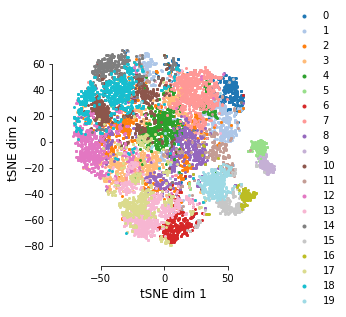

In [8]:
plot_embedding(tsne, cluster)

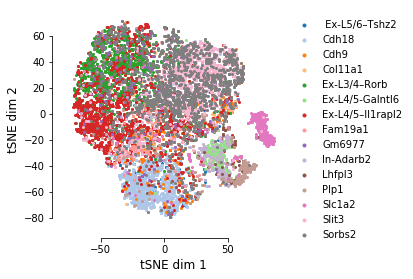

In [16]:
cell_type=pd.read_csv('SNARE-seq/ad_scanpy/cluster.txt',sep='\t', header=None, index_col=0)
cell_label=[cell_type.loc[bc, 1] for bc in barcodes]
plot_embedding(tsne, np.array(cell_label))

/home/xionglei/miniconda3/lib/python3.7/site-packages/matplotlib/figure.py:445: UserWarning: Matplotlib is currently using agg, which is a non-GUI backend, so cannot show the figure.
  % get_backend())


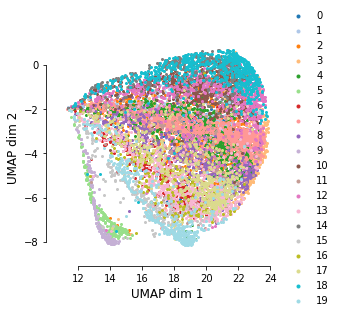

In [145]:
feature=pd.read_csv(indir+'/reg_df_scale/feature.txt', sep='\t', header=None).values
plot_embedding(feature, label, method='UMAP')

In [ ]:
genes=["Rasgrf2","Rorb","Rmst","Thsd7a","Il1rapl2","Galnt14","Pam1","Thsz2","Sulf1","Tle4","Pvalb","Sst","Npy","Vip","Itpr2","Mal"]
#fig=plt.figure()
for gene in genes:
    if gene in rn.var_names:
        exp=rn[barcodes,].obs_vector(gene)       
        #fig.add_subplot()
        plt.figure()
        plt.scatter(tsne[:,0],tsne[:,1], c=exp,s=4)
        plt.title(gene)

In [18]:
indir='/home/xionglei/data/joint_ATAC_RNA/SNARE-seq/output/ad_l0.01_h0.9_p500_2/'
tsne=pd.read_csv(indir+'/tsne.txt', sep=' ', header=None).values
cluster=pd.read_csv(indir+'/cluster_assignments.txt', sep='\t', header=None)[1].values
barcodes=pd.read_csv(indir+'/cluster_assignments.txt', sep='\t', header=None)[0].values

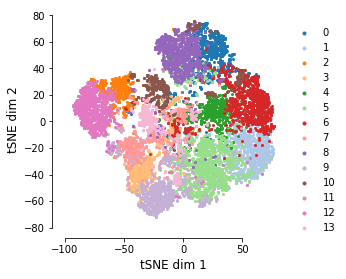

In [19]:
plot_embedding(tsne, cluster)

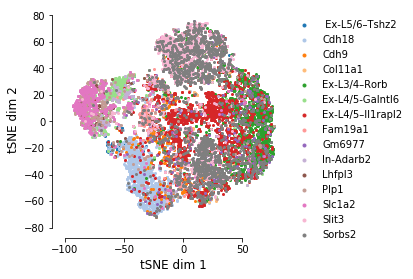

In [20]:
cell_type=pd.read_csv('SNARE-seq/ad_scanpy/cluster.txt',sep='\t', header=None, index_col=0)
cell_label=[cell_type.loc[bc, 1] for bc in barcodes]
plot_embedding(tsne, np.array(cell_label))